# Review of Statistics



## Load Packages

In [1]:
using Dates, DelimitedFiles, StatsBase, Distributions
                         
include("jlFiles/printmat.jl")   #just a function for prettier matrix printing

printlnPs (generic function with 2 methods)

In [2]:
using Plots

backend = "gr"              #"gr" (default), "pyplot" 

if backend == "pyplot"
    pyplot(size=(600,400))
else    
    gr(size=(480,320))
    default(fmt = :svg)
end

# Distributions

## Probability Density Function (pdf)

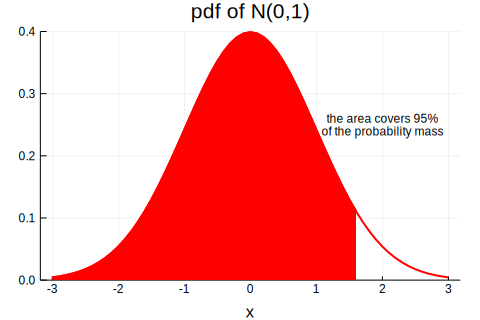

In [3]:
x  = -3:0.1:3
xb = x[x.<=1.645]

p1 = plot(x,pdf.(Normal(0,1),x),color=:red,linewidth=2,legend=nothing,ylims=(0,0.4))
plot!(xb,pdf.(Normal(0,1),xb),color=:red,linewidth=2,legend=nothing,fill=(0,:red))
title!("pdf of N(0,1)")
xlabel!("x")
ylabel!("")
annotate!(2,0.25,text("the area covers 95%\n of the probability mass",8))

## Cumulative Distribution Function (cdf)

and probabilities for different outcomes.

Notice that Distributions package wants Normal($\mu,\sigma$), not Normal($\mu,\sigma^2$).

In [4]:
println("Some probabilities:")
printlnPs("x<=-1.645 when x is N(0,1) ",cdf(Normal(0,1),-1.645))
printlnPs("x<=0 when x is N(0,1)      ",cdf(Normal(0,1),0))
printlnPs("2<x<=3 when x is N(0,2)    ",cdf(Normal(0,sqrt(2)),3)-cdf(Normal(0,sqrt(2)),2))
printlnPs("2<x<=3 when x is N(1,2)    ",cdf(Normal(1,sqrt(2)),3)-cdf(Normal(1,sqrt(2)),2))

Some probabilities:
x<=-1.645 when x is N(0,1)      0.050
x<=0 when x is N(0,1)           0.500
2<x<=3 when x is N(0,2)         0.062
2<x<=3 when x is N(1,2)         0.161


## Quantiles

...inverting the cdf

In [5]:
N05     = quantile(Normal(0,1),0.05)            #from the Distributions package
Chisq05 = quantile(Chisq(5),0.95)

println("\n","5th percentile of N(0,1) and 95th of Chisquare(5)")      #lots of statistics functions
printmat([N05 Chisq05])


5th percentile of N(0,1) and 95th of Chisquare(5)
    -1.645    11.070



## Confidence Bands and t-tests

In [6]:
β = 0.5
σ = 0.15
confB = [(β-1.64*σ) (β+1.64*σ)]                 #confidence band

println("Confidence band for N(β,σ^2) with β=$β and σ=$σ  ",confB)

Confidence band for N(β,σ^2) with β=0.5 and σ=0.15  [0.254 0.746]


In [7]:
tstat1 = (β - 0.4)/σ      #testing H₀: coefficient is 0.4
tstat2 = (β - 0.746)/σ    #testing H₀: coefficient is 0.746
tstat3 = (β - 1)/σ        #testing H₀: coefficient is 1.0

println("t-stats: are they beyond [-1.64,1.64]?")
println([tstat1 tstat2 tstat3])

t-stats: are they beyond [-1.64,1.64]?
[0.666667 -1.64 -3.33333]


## Load Data from a csv File

In [8]:
x = readdlm("Data/FFmFactorsPs.csv",',',skipstart=1)

                #yearmonth, market, small minus big, high minus low
(ym,Rme,RSMB,RHML) = [x[:,i] for i=1:4] 
ym = round.(Int,ym)
x = nothing                   

println("Sample period: ",ym[1],"-",ym[end])

Sample period: 197901-201104


## Means and Standard Deviations

In [9]:
xbar = mean([Rme RHML],dims=1)    #,dims=1 to calculate average along a column
s    = std([Rme RHML],dims=1)     #do \sigma[Tab] to get σ
T    = length(Rme)


println("               Rme       RHML")
printlnPs("means: ",xbar)  #for more stat functions, see the package StatsBase.jl
printlnPs("std:   ",s)

               Rme       RHML
   means:      0.602     0.330
   std:        4.604     3.127


In [10]:
println("std of sample averages (assuming iid data): ",s/sqrt(T))

std of sample averages (assuming iid data): [0.233733 0.158725]


## Skewness, Kurtosis and Bera-Jarque

In [11]:
xStd     = (Rme .- mean(Rme))./std(Rme)
skewness = mean(xStd.^3)
kurtosis = mean(xStd.^4)

BJ     = (T/6)*skewness.^2 + (T/24)*(kurtosis.-3).^2  #chi2(2)
pvalBJ = 1 .- cdf.(Chisq(2),BJ)

println("Skewness, kurtosis and Bera-Jarque (and its p-value)")
printmat([skewness,kurtosis,BJ,pvalBJ])

Skewness, kurtosis and Bera-Jarque (and its p-value)
    -0.806
     5.347
   131.128
     0.000



## Covariances and Correlations

In [12]:
println("\n","cov([Rme RHML]): ")          
printmat(cov([Rme RHML]))

println("\n","cor([Rme RHML]): ")          
printmat(cor([Rme RHML]))

ρ = cor(Rme,RHML)
tstat = T*ρ/sqrt(1-ρ^2)

println("correlation and its t-stat ",[ρ tstat])


cov([Rme RHML]): 
    21.197    -4.875
    -4.875     9.775


cor([Rme RHML]): 
     1.000    -0.339
    -0.339     1.000

correlation and its t-stat [-0.338655 -139.65]


## Often Used Distributions

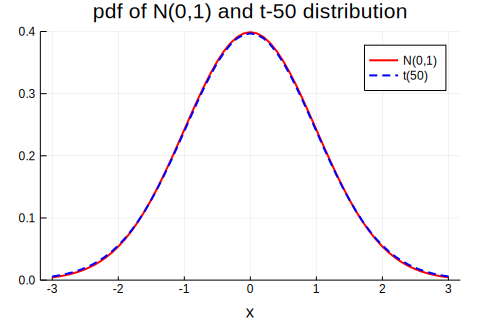

In [13]:
x  = -3:0.1:3

p1 = plot(x,pdf.(Normal(0,1),x),color=:red,linewidth=2,label="N(0,1)",ylims=(0,0.4))
plot!(x,pdf.(TDist(50),x),color=:blue,line=(:dash,2),label="t(50)")
title!("pdf of N(0,1) and t-50 distribution")
xlabel!("x")
ylabel!("")

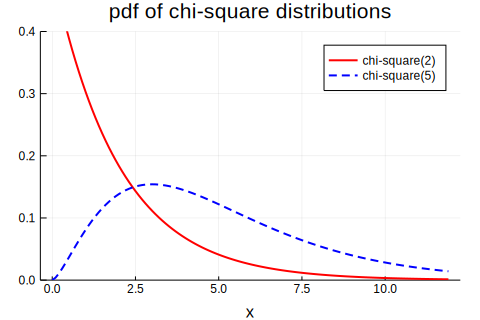

In [14]:
x  = 0.0001:0.1:12

p1 = plot(x,pdf.(Chisq(2),x),color=:red,linewidth=2,label="chi-square(2)",ylims=(0,0.4))
plot!(x,pdf.(Chisq(5),x),color=:blue,line=(:dash,2),label="chi-square(5)")
title!("pdf of chi-square distributions")
xlabel!("x")
ylabel!("")